<a href="https://colab.research.google.com/github/raa18-git/ruchi/blob/main/ml_x2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Iteration 0, Gradient Norm: 4.032563, Cost: 0.667605
Iteration 100, Gradient Norm: 6.846312, Cost: nan
Iteration 200, Gradient Norm: 13.877952, Cost: 79.102095
Iteration 300, Gradient Norm: 6.646852, Cost: nan
Iteration 400, Gradient Norm: 15.911199, Cost: 85.541249
Iteration 500, Gradient Norm: 7.865907, Cost: 16.613238
Iteration 600, Gradient Norm: 7.788479, Cost: nan
Iteration 700, Gradient Norm: 0.000055, Cost: nan
Iteration 800, Gradient Norm: 0.000049, Cost: nan
Iteration 900, Gradient Norm: 0.000043, Cost: nan
Iteration 1000, Gradient Norm: 0.000039, Cost: nan


<ipython-input-1-18b731d35f6a>:18: RuntimeWarning: divide by zero encountered in log
  cost = -np.mean(y * np.log(h) + (1 - y) * np.log(1 - h))
<ipython-input-1-18b731d35f6a>:18: RuntimeWarning: invalid value encountered in multiply
  cost = -np.mean(y * np.log(h) + (1 - y) * np.log(1 - h))


Iteration 1100, Gradient Norm: 0.000036, Cost: nan
Iteration 1200, Gradient Norm: 0.000033, Cost: nan
Iteration 1300, Gradient Norm: 0.000030, Cost: nan
Iteration 1400, Gradient Norm: 0.000028, Cost: nan
Iteration 1500, Gradient Norm: 0.000026, Cost: nan
Iteration 1600, Gradient Norm: 0.000024, Cost: nan
Iteration 1700, Gradient Norm: 0.000023, Cost: nan
Iteration 1800, Gradient Norm: 0.000021, Cost: nan
Iteration 1900, Gradient Norm: 0.000020, Cost: nan
Iteration 2000, Gradient Norm: 0.000019, Cost: nan
Iteration 2100, Gradient Norm: 0.000018, Cost: nan
Iteration 2200, Gradient Norm: 0.000017, Cost: nan
Iteration 2300, Gradient Norm: 0.000016, Cost: nan
Iteration 2400, Gradient Norm: 0.000015, Cost: nan
Iteration 2500, Gradient Norm: 0.000014, Cost: nan
Iteration 2600, Gradient Norm: 0.000014, Cost: nan
Iteration 2700, Gradient Norm: 0.000013, Cost: nan
Iteration 2800, Gradient Norm: 0.000012, Cost: nan
Iteration 2900, Gradient Norm: 0.000012, Cost: nan
Iteration 3000, Gradient Norm: 

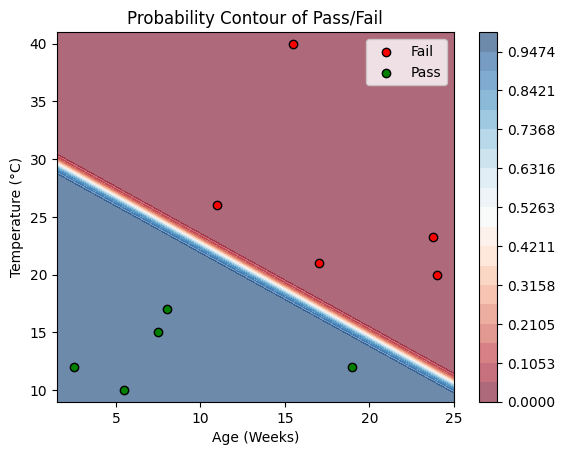

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Data: propellant age and storage temperature
age_in = np.array([15.5, 23.75, 8, 17, 5.5, 19, 24, 2.5, 7.5, 11])
temp_in = np.array([40, 23.25, 17, 21, 10, 12, 20, 12, 15, 26])
X = np.column_stack((age_in, temp_in))  # Feature matrix (Age, Temp)
y = np.array([0, 0, 1, 0, 1, 1, 0, 1, 1, 0], dtype=np.int8)  # Pass/Fail labels

# Logistic function (sigmoid)
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Cost function for logistic regression (log-loss)
def cost_function(w, X, y):
    z = np.dot(X, w)
    h = sigmoid(z)
    cost = -np.mean(y * np.log(h) + (1 - y) * np.log(1 - h))
    return cost

# Gradient of the cost function
def gradient_function(w, X, y):
    z = np.dot(X, w)
    h = sigmoid(z)
    gradient = np.dot(X.T, (h - y)) / len(y)
    return gradient

# Line search function for optimal step size (backtracking line search)
def line_search(cost_function, gradient_function, X, y, w, grad):
    beta = 0.8  # Backtracking parameter
    step_size = 1.0
    c = 1e-4
    cost = cost_function(w, X, y)
    while cost_function(w - step_size * grad, X, y) > cost - c * step_size * np.dot(grad, grad):
        step_size *= beta
    return step_size

# Gradient Descent with Line Search
def gradient_descent(X, y, max_iter=10000, tol=1e-5):
    # Add bias term (intercept)
    X = np.hstack((np.ones((X.shape[0], 1)), X))
    w = np.zeros(X.shape[1])  # Initialize weights (including bias)

    for i in range(max_iter):
        grad = gradient_function(w, X, y)
        grad_norm = np.linalg.norm(grad)
        if grad_norm < tol:
            break
        step_size = line_search(cost_function, gradient_function, X, y, w, grad)
        w -= step_size * grad
        if i % 100 == 0:
            print(f"Iteration {i}, Gradient Norm: {grad_norm:.6f}, Cost: {cost_function(w, X, y):.6f}")

    return w

# Train logistic regression model using gradient descent
weights = gradient_descent(X, y)

# Plotting decision boundary and scatter plot of the data
def plot_decision_boundary(weights, X, y):
    # Create mesh grid for contour plot
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max, 200), np.linspace(x2_min, x2_max, 200))

    # Calculate predictions for each point in the mesh grid
    X_grid = np.c_[np.ones((xx1.ravel().shape[0], 1)), xx1.ravel(), xx2.ravel()]
    z = np.dot(X_grid, weights)
    z = z.reshape(xx1.shape)
    prob = sigmoid(z)

    # Plot contour
    plt.contourf(xx1, xx2, prob, levels=np.linspace(0, 1, 20), cmap="RdBu", alpha=0.6)
    plt.colorbar()

    # Plot the scatter of original data
    plt.scatter(X[y == 0, 0], X[y == 0, 1], color='red', label='Fail', edgecolor='k')
    plt.scatter(X[y == 1, 0], X[y == 1, 1], color='green', label='Pass', edgecolor='k')

    plt.xlabel('Age (Weeks)')
    plt.ylabel('Temperature (°C)')
    plt.legend(loc='best')
    plt.title('Probability Contour of Pass/Fail')
    plt.show()

# Plot the decision boundary and data points
plot_decision_boundary(weights, X, y)



In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Input data: Propellant Age and Storage Temperature
age_in = np.array([15.5, 23.75, 8, 17, 5.5, 19, 24, 2.5, 7.5, 11])
temp_in = np.array([40, 23.25, 17, 21, 10, 12, 20, 12, 15, 26])
X = np.column_stack((age_in, temp_in))  # Feature matrix (Age, Temperature)
y = np.array([0, 0, 1, 0, 1, 1, 0, 1, 1, 0], dtype=np.int8)  # Pass/Fail

# Define sigmoid function
def sigmoid(z):
    z = np.clip(z, -500, 500)  # Prevent overflow
    return 1 / (1 + np.exp(-z))

# Objective (Cost) function with log loss for logistic regression
def objective_function(w):
    z = np.dot(X, w)
    h = sigmoid(z)
    h = np.clip(h, 1e-10, 1 - 1e-10)  # Prevent log(0)
    cost = -np.mean(y * np.log(h) + (1 - y) * np.log(1 - h))
    return cost

# Gradient of the cost function
def gradient_function(w):
    z = np.dot(X, w)
    h = sigmoid(z)
    gradient = np.dot(X.T, (h - y)) / len(y)
    return gradient

# Line search to find optimal step size using backtracking
def line_search(objective_function, gradient, w):
    beta = 0.8  # Backtracking factor
    step_size = 1.0  # Initial step size
    c = 1e-4
    fx1 = objective_function(w)
    for _ in range(100):  # Limit the maximum iterations
        if objective_function(w - step_size * gradient) < fx1 - c * step_size * np.dot(gradient, gradient):
            break
        step_size *= beta
    return step_size

# Gradient Descent algorithm with line search
def gradient_descent(max_iter=10000, tol=1e-5):
    w = np.zeros(X.shape[1])

    for i in range(max_iter):
        grad = gradient_function(w)
        grad_norm = np.linalg.norm(grad)
        if grad_norm < tol:
            break
        step_size = line_search(objective_function, grad, w)
        w -= step_size * grad
        if i % 100 == 0:
            print(f"Iteration {i}, Gradient Norm: {grad_norm:.6f}, Cost: {objective_function(w):.6f}")

    return w

# Train logistic regression model using gradient descent
weights = gradient_descent()

# 2D Decision Boundary and Scatter Plot
plt.figure(figsize=(10, 6))

# Scatter plot of data points
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], c='blue', label='Pass')
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], c='red', label='Fail')

# Create a grid of values for propellant age and storage temperature
x1_range = np.linspace(X[:, 0].min(), X[:, 0].max(), 100)
x2_range = np.linspace(X[:, 1].min(), X[:, 1].max(), 100)
X1, X2 = np.meshgrid(x1_range, x2_range)
Z = weights[0] + weights[1] * X1 + weights[2] * X2
probability = 1 / (1 + np.exp(-Z))

# Plot decision boundary (contour at p = 0.5)
plt.contour(X1, X2, probability, levels=[0.5], colors='green')

# Labels and title
plt.xlabel('Propellant Age (Weeks)')
plt.ylabel('Storage Temperature (°C)')
plt.title('Logistic Regression Decision Boundary')
plt.legend()
plt.show()

# Visualization (3D surface plot of logistic regression)
fig = plt.figure(figsize=(14, 7))

# 3D Surface Plot
ax = fig.add_subplot(121, projection='3d')
x1_range = np.linspace(X[:, 0].min(), X[:, 0].max(), 50)
x2_range = np.linspace(X[:, 1].min(), X[:, 1].max(), 50)
X1, X2 = np.meshgrid(x


SyntaxError: incomplete input (<ipython-input-2-23430ad01e05>, line 92)

Iteration 0, Gradient Norm: 4.032563, Cost: 0.667605
Iteration 100, Gradient Norm: 0.000063, Cost: 0.639399


IndexError: index 2 is out of bounds for axis 0 with size 2

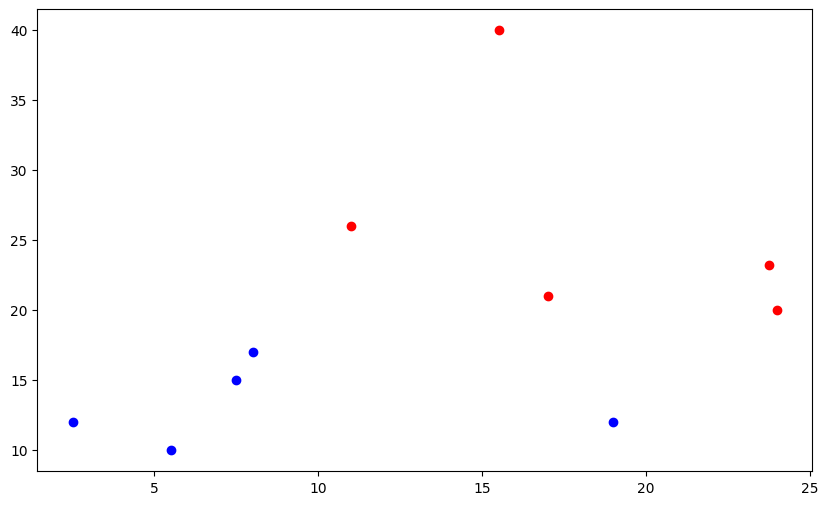

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Input data: Propellant Age and Storage Temperature
age_in = np.array([15.5, 23.75, 8, 17, 5.5, 19, 24, 2.5, 7.5, 11])
temp_in = np.array([40, 23.25, 17, 21, 10, 12, 20, 12, 15, 26])
X = np.column_stack((age_in, temp_in))  # Feature matrix (Age, Temperature)
y = np.array([0, 0, 1, 0, 1, 1, 0, 1, 1, 0], dtype=np.int8)  # Pass/Fail

# Define sigmoid function
def sigmoid(z):
    z = np.clip(z, -500, 500)  # Prevent overflow
    return 1 / (1 + np.exp(-z))

# Objective (Cost) function with log loss for logistic regression
def objective_function(w):
    z = np.dot(X, w)
    h = sigmoid(z)
    h = np.clip(h, 1e-10, 1 - 1e-10)  # Prevent log(0)
    cost = -np.mean(y * np.log(h) + (1 - y) * np.log(1 - h))
    return cost

# Gradient of the cost function
def gradient_function(w):
    z = np.dot(X, w)
    h = sigmoid(z)
    gradient = np.dot(X.T, (h - y)) / len(y)
    return gradient

# Line search to find optimal step size using backtracking
def line_search(objective_function, gradient, w):
    beta = 0.8  # Backtracking factor
    step_size = 1.0  # Initial step size
    c = 1e-4
    fx1 = objective_function(w)
    for _ in range(100):  # Limit the maximum iterations
        if objective_function(w - step_size * gradient) < fx1 - c * step_size * np.dot(gradient, gradient):
            break
        step_size *= beta
    return step_size

# Gradient Descent algorithm with line search
def gradient_descent(max_iter=10000, tol=1e-5):
    w = np.zeros(X.shape[1])

    for i in range(max_iter):
        grad = gradient_function(w)
        grad_norm = np.linalg.norm(grad)
        if grad_norm < tol:
            break
        step_size = line_search(objective_function, grad, w)
        w -= step_size * grad
        if i % 100 == 0:
            print(f"Iteration {i}, Gradient Norm: {grad_norm:.6f}, Cost: {objective_function(w):.6f}")

    return w

# Train logistic regression model using gradient descent
weights = gradient_descent()

# 2D Decision Boundary and Scatter Plot
plt.figure(figsize=(10, 6))

# Scatter plot of data points
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], c='blue', label='Pass')
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], c='red', label='Fail')

# Create a grid of values for propellant age and storage temperature
x1_range = np.linspace(X[:, 0].min(), X[:, 0].max(), 100)
x2_range = np.linspace(X[:, 1].min(), X[:, 1].max(), 100)
X1, X2 = np.meshgrid(x1_range, x2_range)
Z = weights[0] + weights[1] * X1 + weights[2] * X2
probability = 1 / (1 + np.exp(-Z))

# Plot decision boundary (contour at p = 0.5)
plt.contour(X1, X2, probability, levels=[0.5], colors='green')

# Labels and title
plt.xlabel('Propellant Age (Weeks)')
plt.ylabel('Storage Temperature (°C)')
plt.title('Logistic Regression Decision Boundary')
plt.legend()
plt.show()

# Visualization (3D surface plot of logistic regression)
fig = plt.figure(figsize=(14, 7))

# 3D Surface Plot
ax = fig.add_subplot(121, projection='3d')
x1_range = np.linspace(X[:, 0].min(), X[:, 0].max(), 50)
x2_range = np.linspace(X[:, 1].min(), X[:, 1].max(), 50)
X1, X2 = np.meshgrid(x1_range, x2_range)
Z = -weights[0] - weights[1] * X1 - weights[2] * X2
probability = 1 / (1 + np.exp(Z))

ax.plot_surface(X1, X2, probability, cmap='viridis', alpha=0.7)
ax.scatter(X[:, 0], X[:, 1], 1 / (1 + np.exp(-(weights[0] + weights[1] * X[:, 0] + weights[2] * X[:, 1]))),
           c=y, cmap='coolwarm', edgecolors='k', s=50, label='Data Points')
ax.set_xlabel('Propellant Age (Weeks)')
ax.set_ylabel('Storage Temperature (°C)')
ax.set_zlabel('Probability of Passing')
ax.set_title('3D Surface Plot of Logistic Regression')

# Probability vs. z Plot
ax2 = fig.add_subplot(122)

# Compute z values and probabilities for each data point
z_values = weights[0] + weights[1] * X[:, 0] + weights[2] * X[:, 1]
probabilities = 1 / (1 + np.exp(-z_values))

# Define a range of z values for plotting
z_range = np.linspace(z_values.min() - 1, z_values.max() + 1, 100)
prob_range = 1 / (1 + np.exp(-z_range))

# Plot
ax2.plot(z_range, prob_range, color='blue', label='Sigmoid Function')
ax2.scatter(z_values, probabilities, color='red', label='Data Points')
ax2.set_xlabel('z (Linear Combination)')
ax2.set_ylabel('Probability')
ax2.set_title('Probability vs. z (Sigmoid Function)')
ax2.grid(True)
ax2.legend()

plt.tight_layout()
plt.show()
